# Install and import modules

In [1]:
!pip install torch torchvision

Python(62921) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


DEPRECATION: xgbse 0.2.3 has a non-standard dependency specifier pandas>=1.0.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of xgbse or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


# Colour and Illumination Transformations

In [14]:
import os
from torchvision import transforms
from PIL import Image

# Path to the directory where augmented images will be stored on your local system
directory_path = './Images'

# Function to create directory if it doesn't exist
def create_directory(path):
    if not os.path.exists(path):
        os.makedirs(path)

# Apply the function to ensure the directory exists
create_directory(directory_path)

# Load the image from the file system --
image_path = 'cat.jpeg'  # Replace with your local image path
original_image = Image.open(image_path)

# Define the image transformations --
transformations = {
    'Original': transforms.Compose([]),
    'Brightness': transforms.ColorJitter(brightness=0.5),
    'Contrast': transforms.ColorJitter(contrast=0.5),
    'Saturation': transforms.ColorJitter(saturation=0.5),
    'Color Temperature': transforms.ColorJitter(hue=0.1)
}

# Apply the transformations and save the images --
augmented_images = {}
for name, transform in transformations.items():
    # Apply the transformation
    augmented_image = transform(original_image)
    # Define the path for the augmented image
    augmented_image_path = os.path.join(directory_path, f'{name}_image.png')
    # Save the augmented image
    augmented_image.save(augmented_image_path)
    # Store the path in the dictionary
    augmented_images[name] = augmented_image_path

# Output the paths of the saved augmented images --
for name, path in augmented_images.items():
    print(f'{name} image saved at: {path}')


Original image saved at: ./Images/Original_image.png
Brightness image saved at: ./Images/Brightness_image.png
Contrast image saved at: ./Images/Contrast_image.png
Saturation image saved at: ./Images/Saturation_image.png
Color Temperature image saved at: ./Images/Color Temperature_image.png


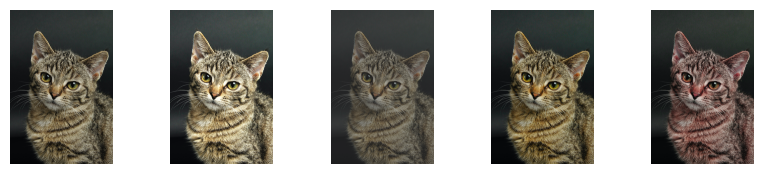

In [21]:
import matplotlib.pyplot as plt # --
from PIL import Image
import os

# Paths to the augmented images
image_paths = [
    'cat.jpeg',
    './Images/Brightness_image.png',
    './Images/Contrast_image.png',
    './Images/Saturation_image.png',
    './Images/Color Temperature_image.png'
]

# Load the images and store them in a list
images = [Image.open(img_path) for img_path in image_paths]

# Set up the figure size
plt.figure(figsize=(10, 2))  # Width, height in inches

# Display each image
for i, img in enumerate(images):
    plt.subplot(1, len(images), i+1)  # 1 row, n columns, ith subplot
    plt.imshow(img)
    plt.axis('off')  # Hide the axes

# Show the plot
plt.show()


# Geometric Transformations

/var/folders/8y/86wps2f91tlbwzxl4cv44md80000gn/T/ipykernel_61537/1339547874.py:11: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  return image.transpose(Image.FLIP_LEFT_RIGHT)
/var/folders/8y/86wps2f91tlbwzxl4cv44md80000gn/T/ipykernel_61537/1339547874.py:14: DeprecationWarning: FLIP_TOP_BOTTOM is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_TOP_BOTTOM instead.
  return image.transpose(Image.FLIP_TOP_BOTTOM)
/var/folders/8y/86wps2f91tlbwzxl4cv44md80000gn/T/ipykernel_61537/1339547874.py:27: DeprecationWarning: AFFINE is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transform.AFFINE instead.
  matrix = image.transform((image.width, image.height), Image.AFFINE, (1, -0.3, 0, -0.1, 1, 0))


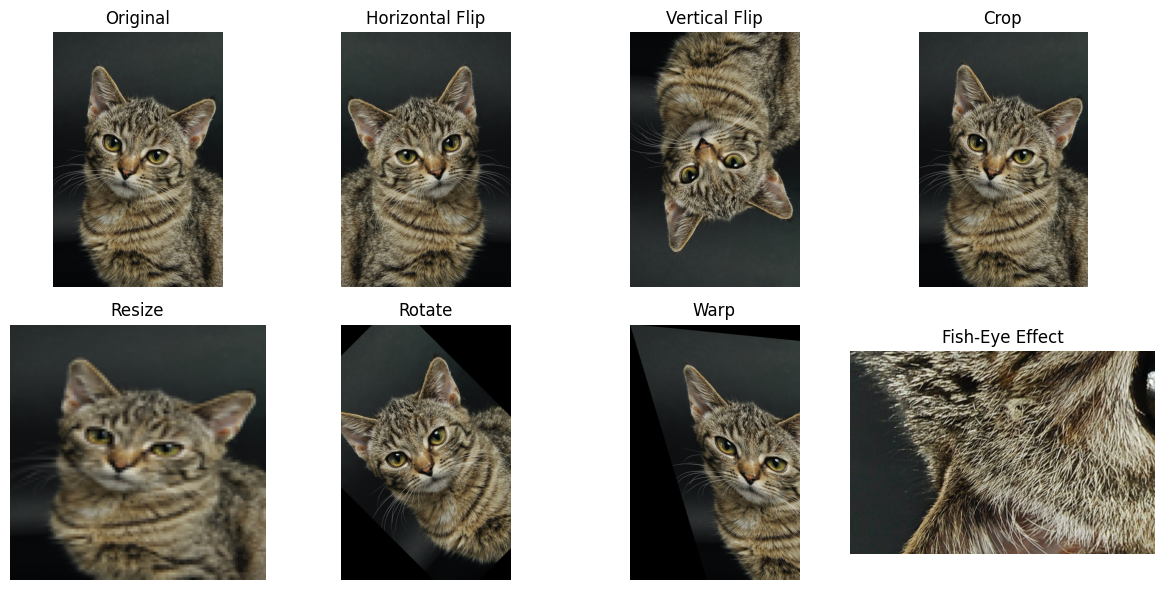

In [22]:
import matplotlib.pyplot as plt # --
from PIL import Image, ImageOps
import numpy as np

# Load the original image --
image_path = 'cat.jpeg'
original_image = Image.open(image_path)

# Define the geometric transformations --
def horizontal_flip(image):
    return image.transpose(Image.FLIP_LEFT_RIGHT)

def vertical_flip(image):
    return image.transpose(Image.FLIP_TOP_BOTTOM)

def crop(image, border=20):
    return image.crop((border, border, image.width - border, image.height - border))

def resize(image, size=(100, 100)):
    return image.resize(size)

def rotate(image, angle=45):
    return image.rotate(angle)

def warp(image):
    # For a simple warp, let's do a swirl using PIL's affine transform
    matrix = image.transform((image.width, image.height), Image.AFFINE, (1, -0.3, 0, -0.1, 1, 0))
    return matrix

def fish_eye(image):
    # Apply a fisheye effect using numpy
    width, height = image.size
    x, y = np.meshgrid(np.arange(height), np.arange(width))
    center_x, center_y = np.array(image.size) / 2
    radius = min(center_x, center_y)
    strength = 0.8  # strength of the effect, between 0 and 1

    # Convert cartesian to polar coordinates
    theta = np.arctan2(y - center_y, x - center_x)
    r = np.sqrt((x - center_x) ** 2 + (y - center_y) ** 2)
    r = r ** strength

    # Convert back to cartesian coordinates
    x = r * np.cos(theta) + center_x
    y = r * np.sin(theta) + center_y

    # Make sure our indices are in bounds
    x = np.clip(x, 0, width - 1).astype(np.uint32)
    y = np.clip(y, 0, height - 1).astype(np.uint32)

    # Sample pixels from the original image
    distorted_image_array = np.array(image)[x, y]
    distorted_image = Image.fromarray(distorted_image_array.astype('uint8'))
    return distorted_image

# Apply each transformation to the original image --
transformations = {
    'Original': original_image,
    'Horizontal Flip': horizontal_flip(original_image),
    'Vertical Flip': vertical_flip(original_image),
    'Crop': crop(original_image),
    'Resize': resize(original_image),
    'Rotate': rotate(original_image),
    'Warp': warp(original_image),
    'Fish-Eye Effect': fish_eye(original_image)
}

# Set up the figure --
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))

# Flatten the axes array for easy iteration
axes = axes.ravel()

# Display each transformed image --
for ax, (title, transformed_image) in zip(axes, transformations.items()):
    ax.imshow(transformed_image)
    ax.set_title(title)
    ax.axis('off')

# Adjust layout --
plt.tight_layout()
plt.show()